# Avantika University
# **Artificial Intelligence - Advance**
## Assignment 1
---
Title : Develop an MNIST hand written digit recognition system using Artificial Neural Network and by Convolutional Neural network.

Description : MNIST Dataset is a large dataset of handwritten digits containing 60,000 images. The candidate is supposed to develop ANN based and CNN based system for the digit recognition classifer.





In [1]:
# Import tensorFlow
import tensorflow as tf

In [2]:
# Import keras from tensorFlow.  Keras is built over tensorFlow  
from tensorflow import keras

In [3]:
#import matplotlib for plotting graphs and images
import matplotlib.pyplot as plt

In [4]:
# Import numpy for performing calculations on list
import numpy as np

**Load the Mnist digit recognition data**

In [5]:
# The model is present at the keras module. We can load the data from keras and split the data into train and test
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

**Understanding the data**

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

The traing images has a shape of 28 x 28, i.e. the image is of 28x28 with only one channel(B/W). 
The training data has 60,000 image data.

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

The testing data has 10,000 image data

**Plotting the image data**



In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

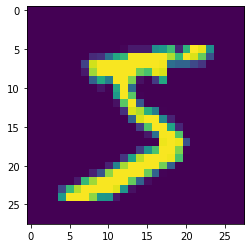

In [11]:
plt.imshow(X_train[0])

**Defining classes**

In [12]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Function to plot image from an given index. With its correct label**

In [13]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

**Reshaping the traing data of Y to make it in 1-D or fast and easy analysis by the algorithm**

In [14]:
y_train=y_train.reshape(-1, )

**Plotting the index**

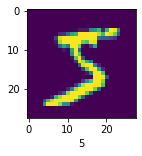

In [15]:
plot_sample(X_train, y_train,0)

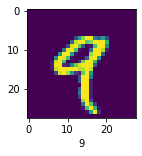

In [16]:
plot_sample(X_train, y_train,4)

**Dividing the trainng and testing data by max value of color. Here the data is divided by 255. It will make the data in range of 0 & 1**

In [17]:
X_train[0] = X_train[0]/255

In [18]:
X_train[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

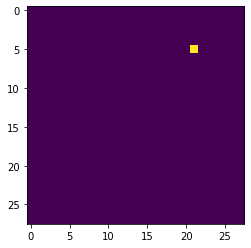

In [19]:
plt.imshow(X_train[0])

In [20]:
X_train=X_train/255

In [21]:
X_test=X_test/255

**Creating an ann model**

In [22]:
# ann model using keras.
ann = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28,1)), # First layer flattens the output to form a vector
                               keras.layers.Dense(3000, activation='relu'), # Second layer is neurons layer. It has 3000 neurons and has activation function as relu
                               keras.layers.Dense(100, activation= 'relu'), # Third layer as 100 neurons which are fully connected with the previous layer. Relu makes the negative numbers as 0
                               keras.layers.Dense(10, activation='sigmoid')]) # The last layer has 10 neurons which are equal to our output classes. It is also output layer.

In [23]:
optimizer='SGD' # optimiser for weight managment and accuracy
loss='sparse_categorical_crossentropy' # Calculating the loss
metrices=['accuracy'] # On which basis we are mesuring the performance of the model

In [24]:
ann.compile(optimizer,loss,metrices) # Compiling the model for it to run

In [25]:
ann.fit(X_train, y_train, epochs=5) # Fitting the training the data into the model. i.e giving the model the training data
# The epochs are kept as 5

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5060 - accuracy: 0.8736
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2515 - accuracy: 0.9288
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2004 - accuracy: 0.9436
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1672 - accuracy: 0.9525
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1427 - accuracy: 0.9600


In [52]:
ann.fit(X_train, y_train, epochs=10) # Fitting the training the data into the model. i.e giving the model the training data
# The epochs are kept as 10

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1240 - accuracy: 0.9654
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1090 - accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0971 - accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0868 - accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0780 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0706 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0644 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0584 - accuracy: 0.9844
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0537 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [26]:
ann.evaluate(X_test, y_test) # Evaluating the model based on the matrices defined

313/313 [==============================] - 2s 7ms/step - loss: 0.1406 - accuracy: 0.9586


[0.14060541987419128, 0.9585999846458435]

In [27]:
# Importing confusion matrix and classification report for more accurate measure of the model's performance
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
y_pred=ann.predict(X_test) # Testing the output by predicting test values on the model

In [29]:
y_pred # Predicted output

array([[6.6895694e-01, 2.7254313e-02, 9.7251844e-01, ..., 9.9994051e-01,
        3.7977117e-01, 7.2818643e-01],
       [8.0907118e-01, 7.0660996e-01, 9.9995929e-01, ..., 2.4995208e-04,
        9.1889465e-01, 6.4817071e-04],
       [2.3341358e-02, 9.9875450e-01, 8.6346912e-01, ..., 7.1308720e-01,
        5.3178972e-01, 1.9384530e-01],
       ...,
       [5.0985813e-03, 2.6222169e-03, 1.8168595e-01, ..., 7.1531254e-01,
        9.5660347e-01, 9.7497487e-01],
       [2.4446207e-01, 2.4306852e-01, 5.1091820e-02, ..., 9.2225373e-03,
        9.7058105e-01, 2.6898772e-02],
       [9.2852783e-01, 1.6146004e-03, 9.9304760e-01, ..., 4.8309565e-04,
        2.2048292e-01, 6.6996217e-03]], dtype=float32)

In [30]:
y_pred_classes=[np.argmax(element) for element in y_pred] # Getting the pretedted classes my fetching only the highest probablity value

In [31]:
print("classification report\n",classification_report(y_test,y_pred_classes)) # Printing the classification report

classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.97      0.96      1032
           3       0.97      0.94      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.96      0.95       892
           6       0.95      0.97      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.94      0.95       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



**F1 Score for the ann is 0.96**

In [32]:
y_pred_classes[:5], y_test[:5] # Checking the first 5 values of the predicted classes and the actual classes

([7, 2, 1, 0, 4], array([7, 2, 1, 0, 4], dtype=uint8))

In [33]:
# importing beckend from keras for getting the data format of the data
from keras import backend as k

In [34]:
# Reshaping the data in the correct format based on the format of the data 
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
   X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
   X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

Shape format - (number of elements, Rows, Columns, Channels) 

In [35]:
X_train.shape

(60000, 28, 28, 1)

The initial shape was (60000, 28, 28) nd after re-shaping the shape is (60000, 28, 28, 1)

**Creating the CNN model**

In [36]:
cnn = keras.models.Sequential([
                               keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), # Layer 1 of the convolution. It has 32 filters with a kernal of 3x3.
                               keras.layers.MaxPooling2D((2,2)), # pooling is used to decrease the size. here it is reducing the size to half
                               keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'), # Layer 2 of convolution. It has 64 filter with a kernal of 3x3
                               keras.layers.MaxPooling2D((2,2)), # pooling layer of 2x2 to decrease the size by half                   
                               keras.layers.Flatten(), # Layer of vectorising the data
                               keras.layers.Dense(64,activation='relu'), # first FC layer
                               keras.layers.Dense(10,activation='softmax') # The output layer. The output has a softmax activation function
])

In [37]:
cnn2 = keras.models.Sequential([
                               keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), # Layer 1 of the convolution. It has 32 filters with a kernal of 3x3.
                               keras.layers.MaxPooling2D((2,2)), # pooling is used to decrease the size. here it is reducing the size to half
                              #  keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'), # Layer 2 of convolution. It has 64 filter with a kernal of 3x3
                              #  keras.layers.MaxPooling2D((2,2)), # pooling layer of 2x2 to decrease the size by half                   
                               keras.layers.Flatten(), # Layer of vectorising the data
                               keras.layers.Dense(32,activation='relu'), # first FC layer
                               keras.layers.Dense(10,activation='softmax') # The output layer. The output has a softmax activation function
])

In [38]:
cnn3 = keras.models.Sequential([
                               keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), # Layer 1 of the convolution. It has 32 filters with a kernal of 3x3.
                               keras.layers.MaxPooling2D((2,2)), # pooling is used to decrease the size. here it is reducing the size to half
                               keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'), # Layer 2 of convolution. It has 64 filter with a kernal of 3x3
                               keras.layers.MaxPooling2D((2,2)), # pooling layer of 2x2 to decrease the size by half
                               keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'), # Layer 3 of convolution. It has 128 filter with a kernal of 3x3
                               keras.layers.MaxPooling2D((2,2)), # pooling layer of 2x2 to decrease the size by half                       
                               keras.layers.Flatten(), # Layer of vectorising the data
                               keras.layers.Dense(128,activation='relu'), # first FC layer
                               keras.layers.Dense(10,activation='softmax') # The output layer. The output has a softmax activation function
])

In [39]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Compilation of the cnn model

In [40]:
cnn2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Compilation of the cnn model

In [41]:
cnn3.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Compilation of the cnn model

In [42]:
y_train.shape

(60000,)

In [43]:
cnn.fit(X_train,y_train,epochs=5) # Fitting the data in the cnn model

Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1422 - accuracy: 0.9567
Epoch 2/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0467 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0339 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0176 - accuracy: 0.9943


In [44]:
cnn2.fit(X_train,y_train,epochs=10) # Fitting the data in the cnn model

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1957 - accuracy: 0.9445
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0686 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0486 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0291 - accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0177 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0154 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0111 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [45]:
cnn3.fit(X_train,y_train,epochs=5) # Fitting the data in the cnn model

Epoch 1/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.7325 - accuracy: 0.7779
Epoch 2/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1837 - accuracy: 0.9427
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1324 - accuracy: 0.9596
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1086 - accuracy: 0.9650
Epoch 5/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0902 - accuracy: 0.9719


In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [47]:
y_pred=cnn.predict(X_test) # Testing the output by predicting test values on the model

In [48]:
y_pred[:5] # First 5 prediction

array([[3.6149618e-11, 5.5427902e-09, 1.8251541e-08, 9.6953222e-08,
        1.8808884e-10, 8.8427939e-11, 2.1152406e-13, 9.9999535e-01,
        8.5511438e-09, 4.5235211e-06],
       [4.4382682e-07, 3.3169513e-06, 9.9999535e-01, 6.3610298e-11,
        5.1517102e-12, 3.2424286e-14, 4.4545921e-08, 6.1426211e-11,
        8.6642456e-07, 5.4291533e-11],
       [3.8304385e-10, 9.9998772e-01, 3.9383719e-10, 7.8462896e-11,
        8.6012287e-06, 5.7262820e-08, 5.0971303e-09, 3.5455680e-06,
        5.6789141e-08, 1.0023769e-07],
       [9.9999404e-01, 3.9937182e-09, 8.3519103e-10, 1.0720256e-10,
        5.0587384e-10, 5.2082168e-08, 5.8098708e-06, 7.1745674e-08,
        8.2070128e-09, 7.0273587e-09],
       [9.8617994e-09, 1.5252216e-06, 2.4643541e-11, 1.8275464e-10,
        9.9999213e-01, 8.4621597e-08, 2.5406166e-08, 7.6743003e-09,
        1.7999733e-08, 6.1975347e-06]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred] # Getting the pretedted classes my fetching only the highest probablity value

In [50]:
y_classes[:5], y_test[:5] # Comparison of the first 5 elements of the prediction and the actual valus

([7, 2, 1, 0, 4], array([7, 2, 1, 0, 4], dtype=uint8))

In [51]:
print("Classification Report\n",classification_report(y_test,y_classes)) # Classification report of the CNN

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Comparision of the f1 score of ANN and CNN**



*   Ann - 0.96
*   CNN - 0.99













**Conclusion**

In this case the ann and the cnn both performed well. From the example from class the difference is much higher with rgb images.

In [51]:
Submitted by - Jayant Choudhary (AU18B1003) 